In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

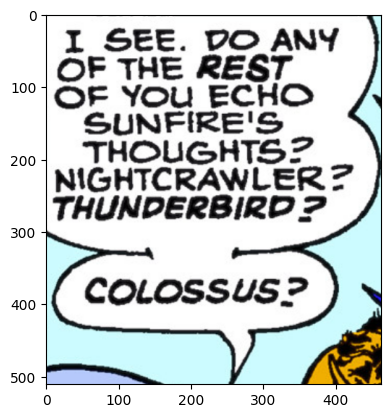

In [24]:
image_path = "bubble_6.png"
img=cv.imread(image_path)
plt.imshow(img)

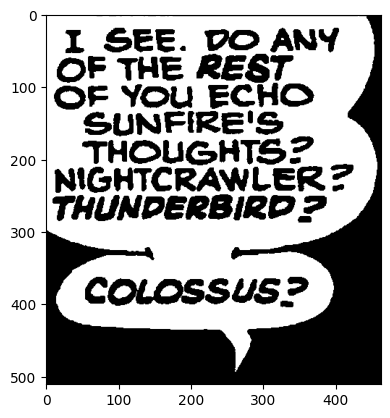

In [25]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
limit1 = (0, 0, 200)
limit2 = (180,20, 255)
mask = cv.inRange(hsv, limit1, limit2)
plt.imshow(mask, cmap='gray')

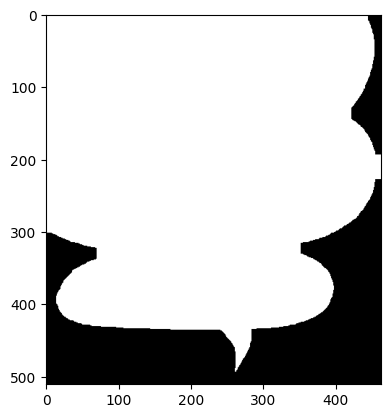

In [26]:
mask=cv.dilate(mask, None, iterations=7)
mask=cv.erode(mask, None, iterations=7)
plt.imshow(mask, cmap='gray')

# centro do contorno
# pegar ponto de maior distancia do centro
# tracar reta entre centro e ponto de maior distancia
# ou 
# pegar ponto de maior derivada negativa do contorno
# ou
# # detector de cantos Harris

218 206


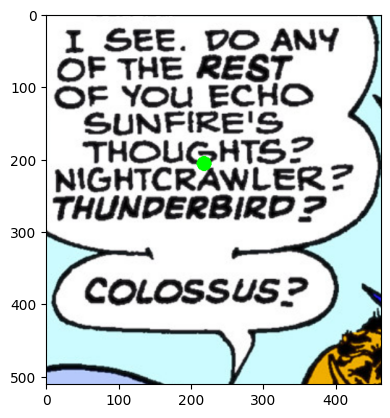

In [27]:
# pegar centro do maior contorno
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=cv.contourArea)
M = cv.moments(contour)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)
cv.circle(img, (cx, cy), 5, (0, 255, 0), 10)
plt.imshow(img, cmap='gray')

218 206 8 445


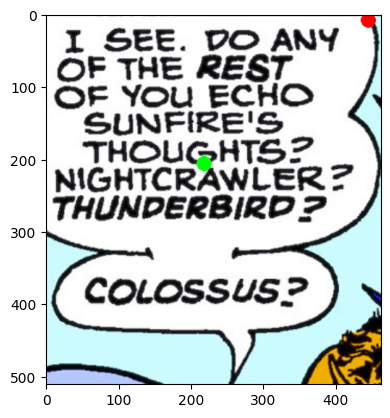

In [28]:
# pegar ponto de maior derivada negativa do contorno
img=cv.imread(image_path)
""" diff = np.diff(contour, axis=0)
max_diff = 0
max_diff_point = None
for i in range(len(diff)):
    x, y = diff[i][0]
    distance = np.sqrt(x**2 + y**2)
    if distance > max_diff and x > 0 and y > 0:
        max_diff = distance
        max_diff_point = contour[i][0] """

gradient_x = cv.Sobel(mask, cv.CV_64F, 1, 0, ksize=3)
gradient_y = cv.Sobel(mask, cv.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
max_gradient_value = np.max(gradient_magnitude)
max_diff_point = np.unravel_index(np.argmax(gradient_magnitude), gradient_magnitude.shape)

x, y = max_diff_point
print(cx, cy, x, y)
cv.circle(img, (cx, cy), 5, (0, 255, 0), 10)
cv.circle(img, (y, x), 5, (255, 0, 0), 10)
plt.imshow(img, cmap='gray')


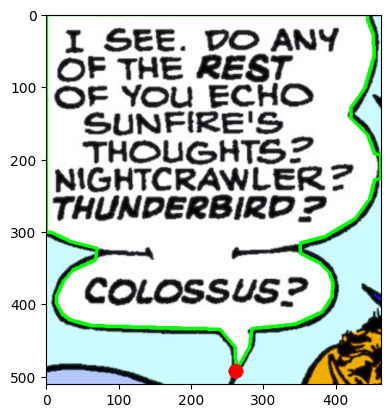

In [29]:
img = cv.imread(image_path)
epsilon = 0.001 * cv.arcLength(contour, True)
approx = cv.approxPolyDP(contour, epsilon, True)
cv.drawContours(img, [approx], -1, (0, 255, 0), 3)
hull = cv.convexHull(approx)
target_point = (hull[:,0,0].min() + hull[:,0,0].max()) // 2, hull[:,0,1].max()  # Adjust for your specific point of interest
closest_point = min(hull, key=lambda point: np.linalg.norm(point[0] - target_point))
cv.circle(img, tuple(closest_point[0]), 5, (255, 0, 0), 10)
plt.imshow(img, cmap='gray')

6.494827747344971


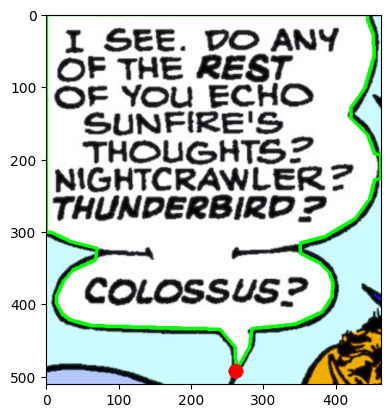

In [30]:
img = cv.imread(image_path)
epsilon = 0.001 * cv.arcLength(contour, True)
approx = cv.approxPolyDP(contour, epsilon, True)
ellipse = cv.fitEllipse(approx)
angle = ellipse[2]
if angle > 90:
    angle -= 180
rotated_image = np.copy(img)
rotated_contour = cv.rotate(approx, cv.ROTATE_90_COUNTERCLOCKWISE if angle > 0 else cv.ROTATE_90_CLOCKWISE)
cv.drawContours(rotated_image, [approx], -1, (0, 255, 0), 3)
hull = cv.convexHull(approx)
target_point = (hull[:,0,0].min() + hull[:,0,0].max()) // 2, hull[:,0,1].max()  # Adjust for your specific point of interest
closest_point = min(hull, key=lambda point: np.linalg.norm(point[0] - target_point))
cv.circle(rotated_image, tuple(closest_point[0]), 5, (255, 0, 0), 10)
plt.imshow(rotated_image, cmap='gray')
print(angle)

# TODO achar menor angulo convexo do poligono

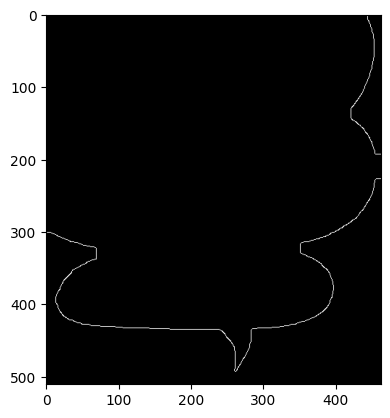

In [31]:
canny = cv.Canny(mask, 100, 200)
plt.imshow(canny, cmap='gray')